# In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

In [229]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Dataset

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

### Attribute Information:
    
    Listing of attributes**: >50K, <=50K.
    
    age: continuous.
    
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    
    fnlwgt: continuous.
    
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,Doctorate, 5th-6th, Preschool.
    
    education-num: continuous.

    
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    
    sex: Female, Male.
    
    capital-gain: continuous.
    
    capital-loss: continuous.
    
    hours-per-week: continuous.
    
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.

In [230]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                        header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', 
                       skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
              'marital_status', 'occupation','relationship', 'race', 'sex', 
              'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [231]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [232]:
train_set.shape

(32561, 15)

In [233]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [234]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [235]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

## Dropping Education column as it is same as education_num

In [236]:
train_set.drop(['education'], axis=1, inplace=True)

In [237]:
#

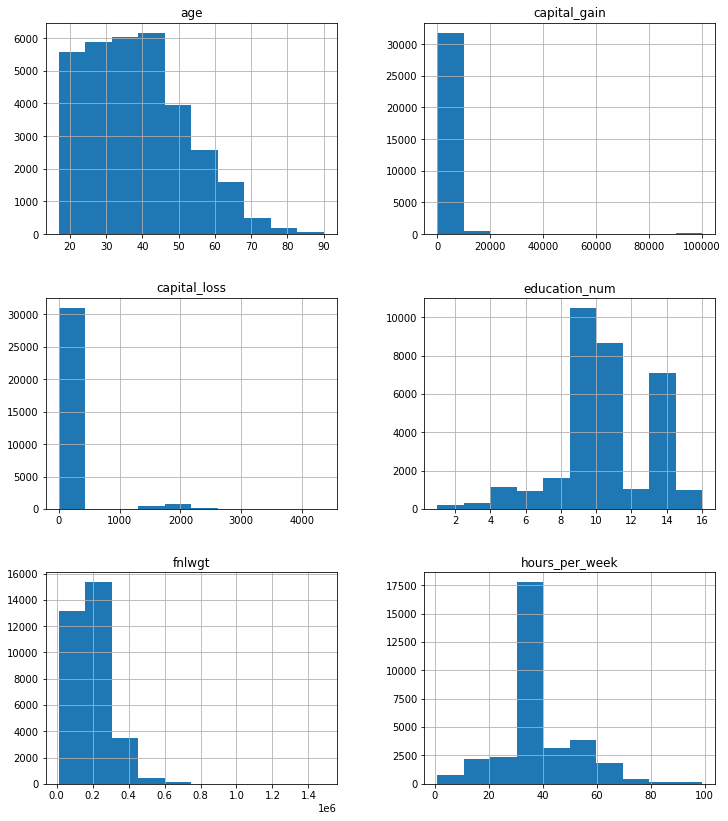

In [238]:
train_set.select_dtypes(exclude=object).hist(figsize=[12, 14])
plt.show()

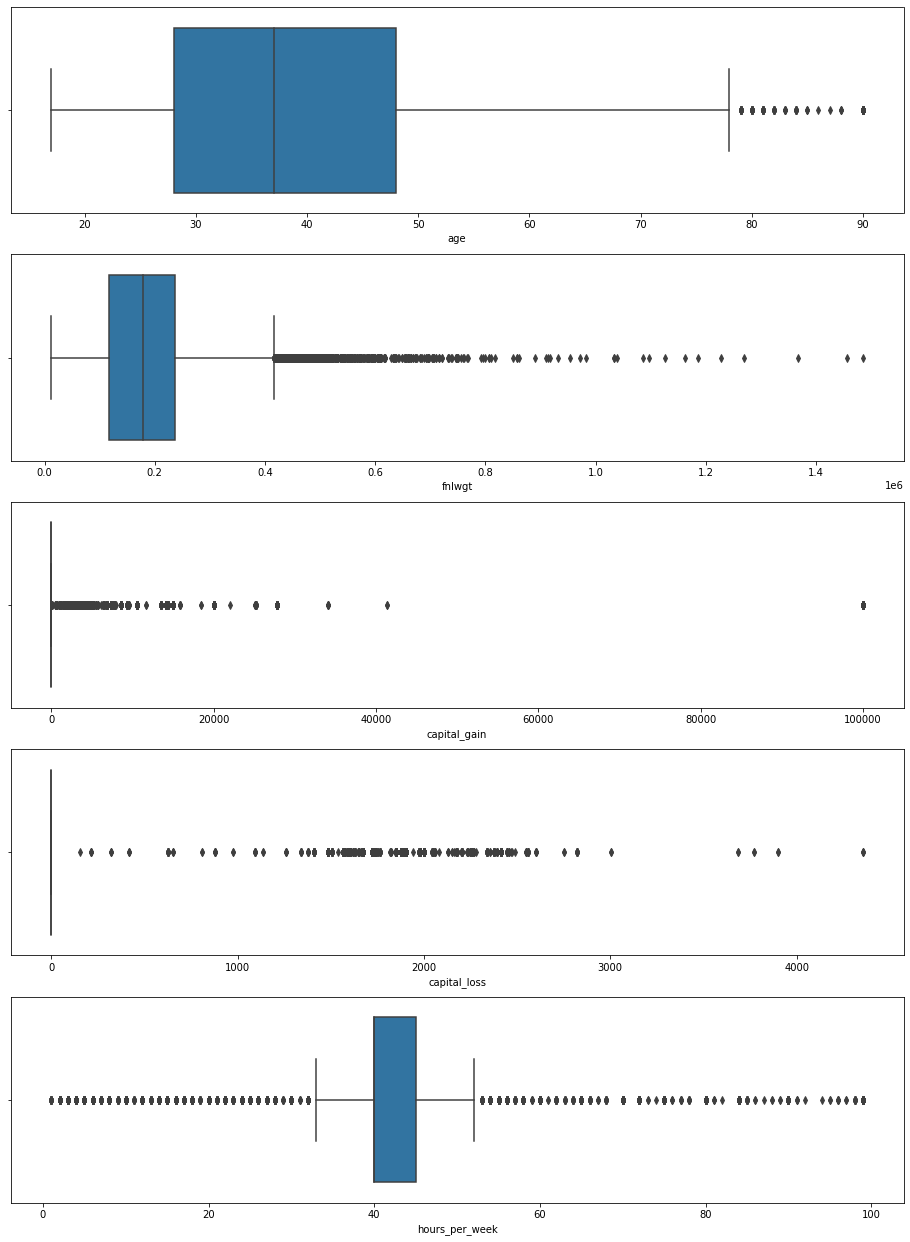

<Figure size 432x288 with 0 Axes>

In [239]:
num_cols = train_set.select_dtypes(exclude=object).columns.tolist()
num_cols.remove('education_num')
# plt.figure(figsize=[16,16])
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[16,22])

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=train_set, ax=axes[i])
    
# sns.boxplot(data=train_set[num_cols])
plt.show()
plt.tight_layout()

## Handling Outliers

In [240]:
q = train_set['capital_gain'].quantile(0.95)
# removing top 5% from the capital_gain column
train_set = train_set[train_set['capital_gain']<q]

q = train_set['capital_loss'].quantile(0.99)
# removing top 5% from the capital_gain column
train_set = train_set[train_set['capital_loss']<q]

# q_top = train_set['capital_loss'].quantile(0.98)
# q_down = train_set['capital_loss'].quantile(0.02)
# # removing 2% from top a & bottom from from hours_per_week column
# train_set = train_set[(train_set['hours_per_week']<q_top) & (train_set['hours_per_week']>q_down)]

In [241]:
q = train_set['capital_gain'].quantile(0.98)
# removing top 5% from the capital_gain column
train_set = train_set[train_set['capital_gain']<q]

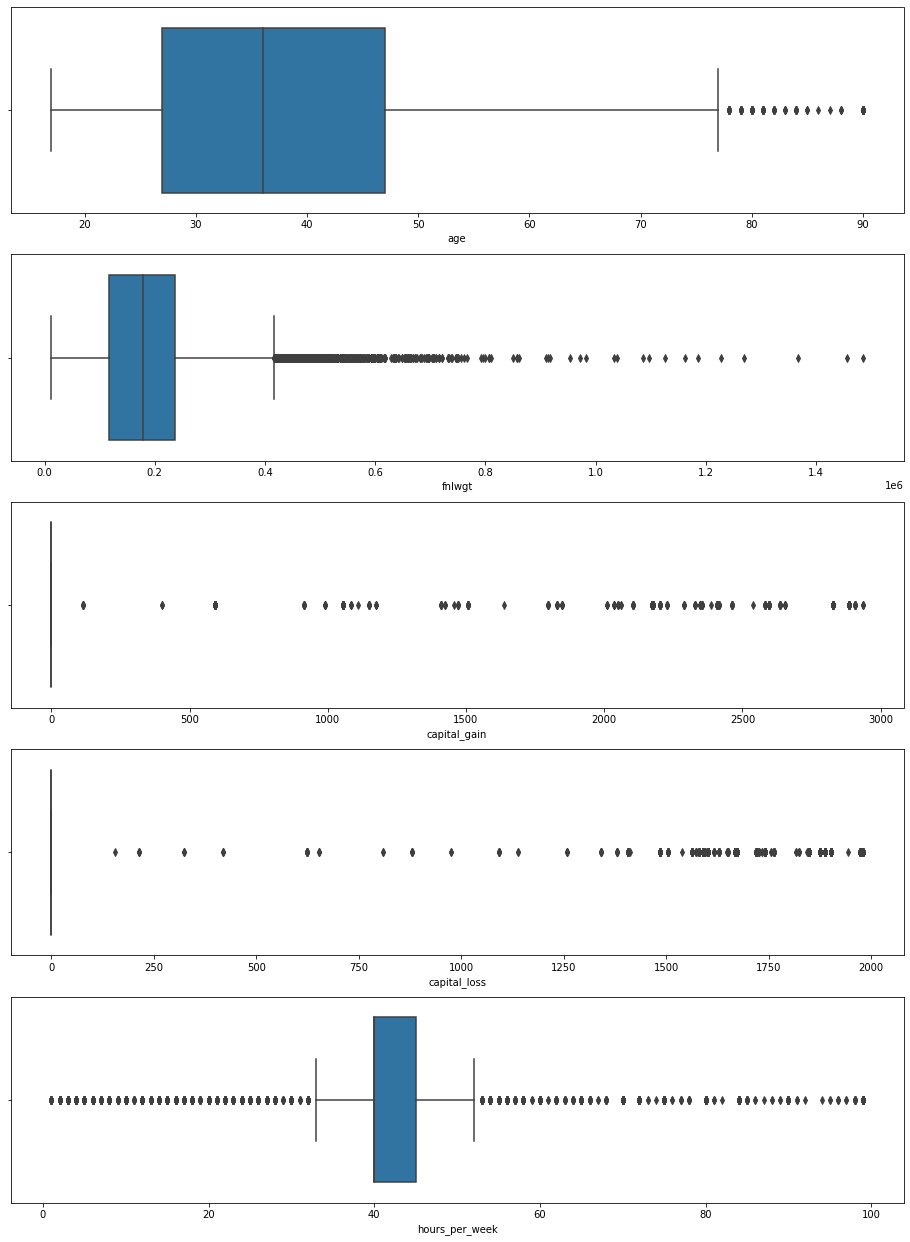

<Figure size 432x288 with 0 Axes>

In [242]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[16,22])

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=train_set, ax=axes[i])
    
plt.show()
plt.tight_layout()

In [243]:
# train_set['capital_gain'].quantile(0.98)
train_set.shape

(29974, 14)

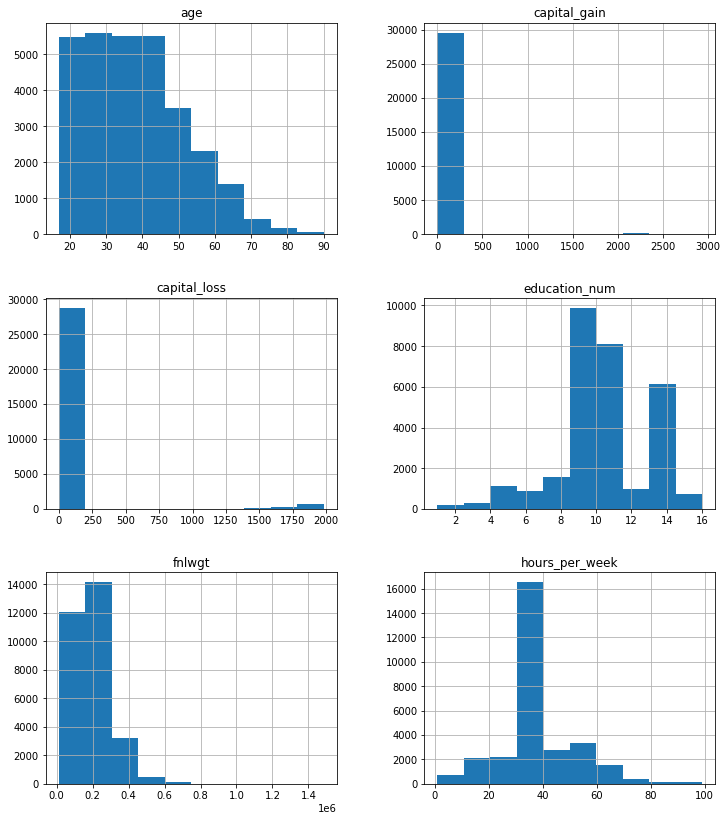

In [244]:
train_set.select_dtypes(exclude=object).hist(figsize=[12, 14])
plt.show()

## Scaling Numerical Values

In [245]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_set[num_cols] = sc.fit_transform(train_set[num_cols])

In [246]:
num_cols

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [247]:
for col in train_set.select_dtypes(object):
    print(col.upper(), '\n')
    print(train_set[col].value_counts())
    print('='*50, '\n')

WORKCLASS 

 Private             21085
 Self-emp-not-inc     2272
 Local-gov            1909
 ?                    1734
 State-gov            1196
 Self-emp-inc          896
 Federal-gov           862
 Without-pay            13
 Never-worked            7
Name: workclass, dtype: int64

MARITAL_STATUS 

 Married-civ-spouse       13127
 Never-married            10329
 Divorced                  4187
 Separated                  974
 Widowed                    935
 Married-spouse-absent      400
 Married-AF-spouse           22
Name: marital_status, dtype: int64

OCCUPATION 

 Craft-repair         3801
 Adm-clerical         3570
 Prof-specialty       3570
 Exec-managerial      3493
 Sales                3338
 Other-service        3223
 Machine-op-inspct    1893
 ?                    1741
 Transport-moving     1491
 Handlers-cleaners    1318
 Farming-fishing       927
 Tech-support          854
 Protective-serv       601
 Priv-house-serv       145
 Armed-Forces            9
Name: occupation, d

In [248]:
data_catg = train_set.select_dtypes(object)

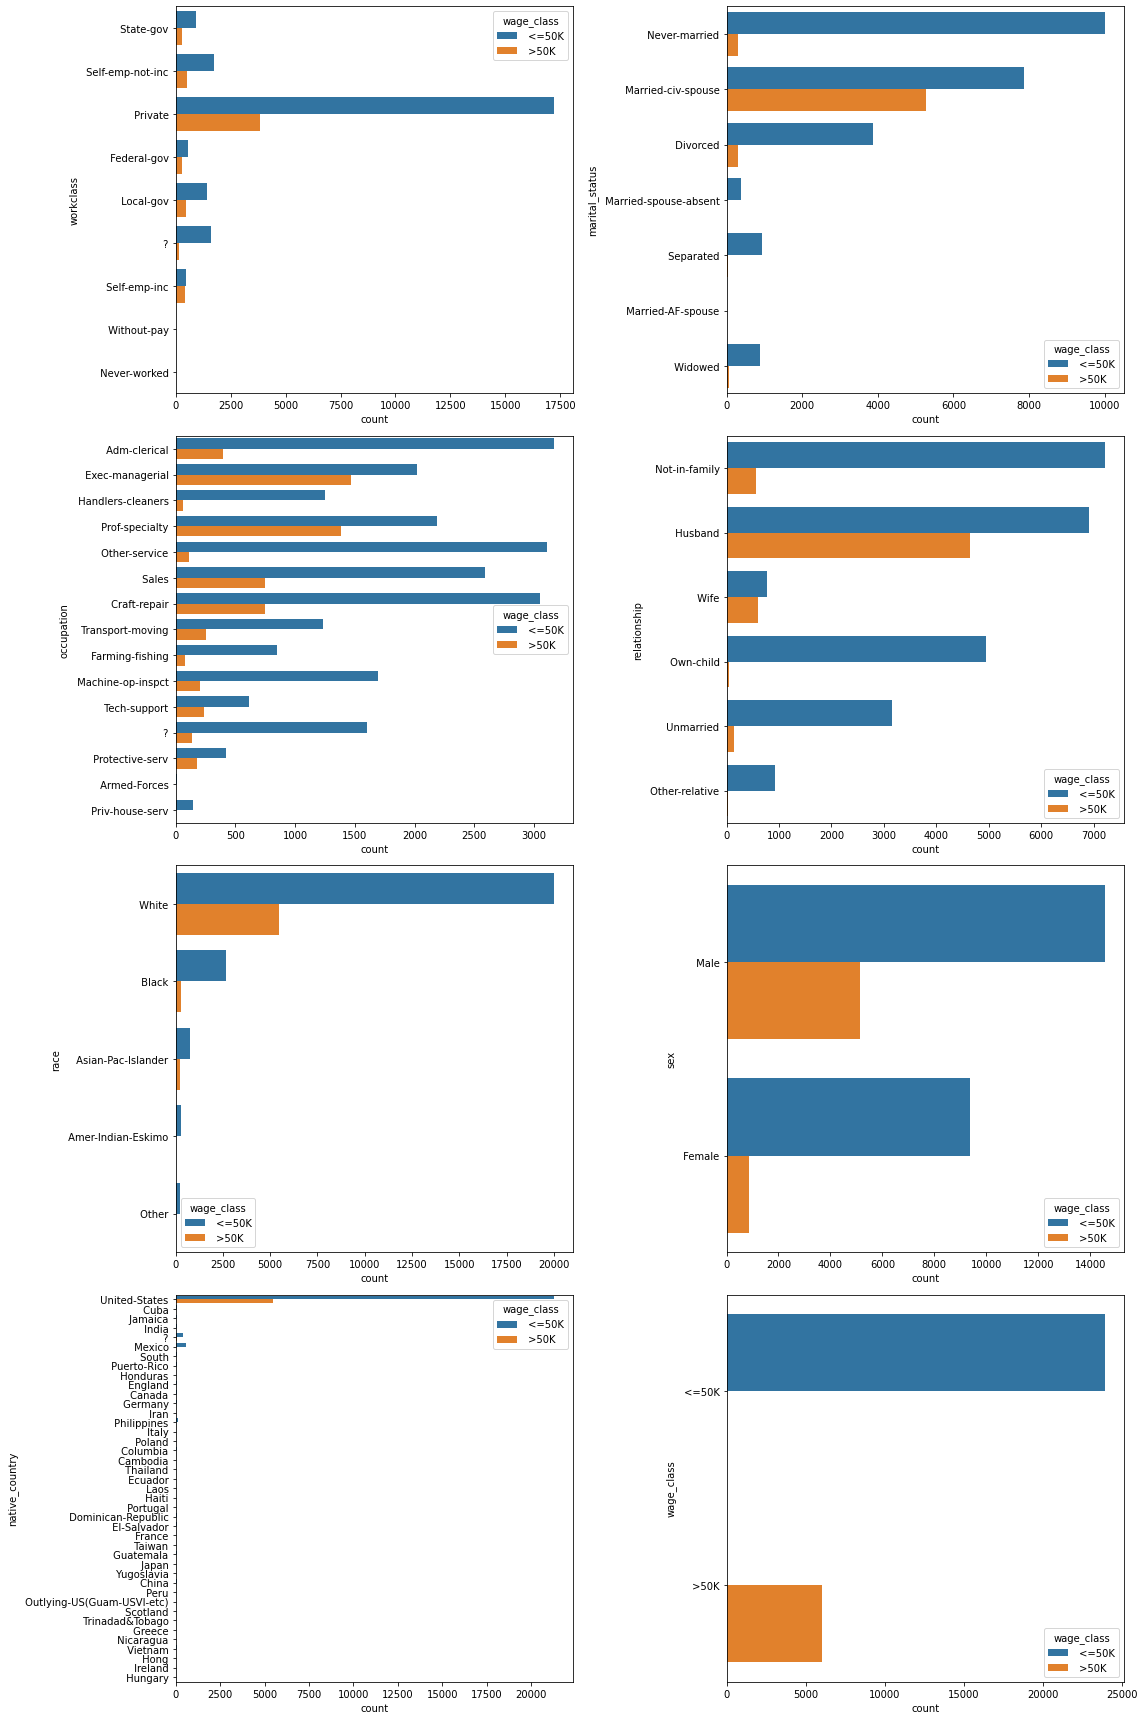

In [249]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=[16,24])
for i, ax in enumerate(axes.flatten()):
    sns.countplot(y=data_catg.columns[i], hue='wage_class', data=data_catg, ax=ax)

# sns.countplot(x='workclass', hue='wage_class', data=train_set.select_dtypes(object))
# plt.show()

plt.tight_layout();

# Encoding Categorical Columns

In [250]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in data_catg.columns:
    encoders[col + '_enc'] = LabelEncoder()
    train_set[col] = encoders[col + '_enc'].fit_transform(train_set[col])

In [251]:
encoders

{'workclass_enc': LabelEncoder(),
 'marital_status_enc': LabelEncoder(),
 'occupation_enc': LabelEncoder(),
 'relationship_enc': LabelEncoder(),
 'race_enc': LabelEncoder(),
 'sex_enc': LabelEncoder(),
 'native_country_enc': LabelEncoder(),
 'wage_class_enc': LabelEncoder()}

In [252]:
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,0.069313,7,-1.063124,13,4,1,1,4,1,8.292619,-0.201159,-0.006561,38,0
1,0.877402,6,-1.008331,13,2,4,0,4,1,-0.115967,-0.201159,-2.193433,38,0
2,-0.004149,4,0.242914,9,0,6,1,4,1,-0.115967,-0.201159,-0.006561,38,0
3,1.097789,4,0.423271,7,2,6,0,2,1,-0.115967,-0.201159,-0.006561,38,0
4,-0.738775,4,1.403655,13,2,10,5,2,0,-0.115967,-0.201159,-0.006561,5,0


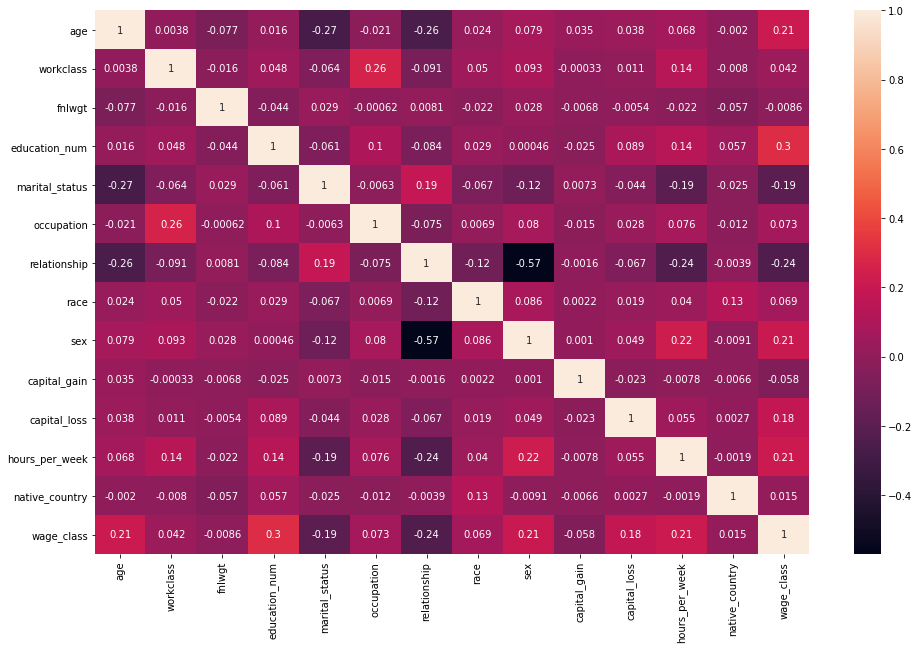

In [253]:
plt.figure(figsize=[16,10])
sns.heatmap(train_set.corr(), annot=True)
plt.show()

In [254]:
#

## Dropping 'fnlwgt' and 'native_country'

In [255]:
train_set.drop(['fnlwgt', 'native_country'], axis=1, inplace=True)

In [256]:
train_set.shape

(29974, 12)

In [257]:
train_set.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,0.069313,7,13,4,1,1,4,1,8.292619,-0.201159,-0.006561,0
1,0.877402,6,13,2,4,0,4,1,-0.115967,-0.201159,-2.193433,0
2,-0.004149,4,9,0,6,1,4,1,-0.115967,-0.201159,-0.006561,0
3,1.097789,4,7,2,6,0,2,1,-0.115967,-0.201159,-0.006561,0
4,-0.738775,4,13,2,10,5,2,0,-0.115967,-0.201159,-0.006561,0


In [258]:
encoders['wage_class_enc'].classes_

array([' <=50K', ' >50K'], dtype=object)

In [259]:
X_train = train_set.drop(['wage_class'], axis=1)
y_train = train_set['wage_class']

## Encoding and Scaling The test set

In [260]:
test_set[num_cols] = sc.transform(test_set[num_cols])

In [261]:
# for col, enc in encoders.items():
#     for i in range(len(enc.classes_)):
#         enc.classes_[i] = enc.classes_[i].strip()
#     encoders[col] = enc

In [262]:
for col in data_catg.select_dtypes(object).columns[:-1]:
    print(col)
    test_set[col] = encoders[col + '_enc'].transform(test_set[col])

workclass
marital_status
occupation
relationship
race
sex
native_country


In [263]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,-0.959163,4,0.348396,11th,7,4,7,3,2,1,-0.115967,-0.201159,-0.006561,38,<=50K.
1,-0.004149,4,-0.946845,HS-grad,9,2,5,0,4,1,-0.115967,-0.201159,0.803392,38,<=50K.
2,-0.738775,2,1.389870,Assoc-acdm,12,2,11,0,4,1,-0.115967,-0.201159,-0.006561,38,>50K.
3,0.436626,4,-0.280172,Some-college,10,2,7,0,2,1,29.619639,-0.201159,-0.006561,38,>50K.
4,-1.473401,0,-0.817470,Some-college,10,4,0,3,4,0,-0.115967,-0.201159,-0.816513,38,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.069313,4,0.240768,Bachelors,13,0,10,1,4,0,-0.115967,-0.201159,-0.330542,38,<=50K.
16277,1.905878,0,1.242861,HS-grad,9,6,0,2,2,1,-0.115967,-0.201159,-0.006561,38,<=50K.
16278,-0.004149,4,1.749468,Bachelors,13,2,10,0,4,1,-0.115967,-0.201159,0.803392,38,<=50K.
16279,0.436626,4,-1.002847,Bachelors,13,0,1,3,1,1,20.982853,-0.201159,-0.006561,38,<=50K.


In [264]:
encoders['wage_class_enc'].classes_

array([' <=50K', ' >50K'], dtype=object)

In [265]:
X_test = test_set[X_train.columns]
y_test = (test_set['wage_class'] == ' >50K.').astype(int)

In [266]:
sum(y_test == 1)

3846

In [267]:
test_set['wage_class'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64

In [269]:
X_test.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,-0.959163,4,7,4,7,3,2,1,-0.115967,-0.201159,-0.006561
1,-0.004149,4,9,2,5,0,4,1,-0.115967,-0.201159,0.803392
2,-0.738775,2,12,2,11,0,4,1,-0.115967,-0.201159,-0.006561
3,0.436626,4,10,2,7,0,2,1,29.619639,-0.201159,-0.006561
4,-1.473401,0,10,4,0,3,4,0,-0.115967,-0.201159,-0.816513


In [270]:
#

# XGBoost Model

In [278]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

In [272]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [276]:
xgb.score(X_train, y_train)

0.8889370788016281

In [277]:
xgb.score(X_test, y_test)

0.8181929856888398

In [279]:
# Predictions
y_pred = xgb.predict(X_test)

In [281]:
accuracy_score(y_test, y_pred)

0.8181929856888398

In [282]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12435
           1       0.67      0.45      0.54      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.69      0.71     16281
weighted avg       0.80      0.82      0.80     16281



In [283]:
f1_score(y_test, y_pred)

0.5380774032459426

Text(33.0, 0.5, 'Actual classes')

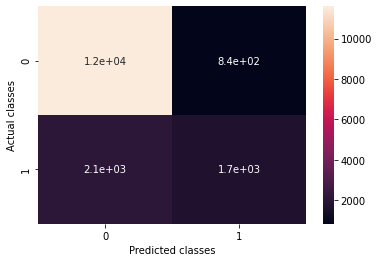

In [285]:
confmat = confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [286]:
#

## Hyperparameter Optimization

In [287]:
from sklearn.model_selection import GridSearchCV

In [290]:
param_grid={'learning_rate':[1,0.5,0.1,0.01,0.001], 
            'max_depth': [3,5,10,20], 
            'n_estimators':[10,50,100,200]}

In [292]:
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, n_jobs=-1, cv=10, verbose=1)
grid_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 28.1min finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [293]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [294]:
grid_xgb.best_score_

0.8659840739115812

In [296]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Model Using Best Parameters

In [298]:
best_xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [299]:
best_xgb.score(X_train, y_train)

0.8770267565223193

In [300]:
best_xgb.score(X_test, y_test)

0.8209569436766784

In [301]:
# Predictions
y_pred = best_xgb.predict(X_test)

In [302]:
accuracy_score(y_test, y_pred)

0.8209569436766784

In [303]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12435
           1       0.69      0.44      0.54      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281



In [304]:
f1_score(y_test, y_pred)

0.5382543956914304

Text(33.0, 0.5, 'Actual classes')

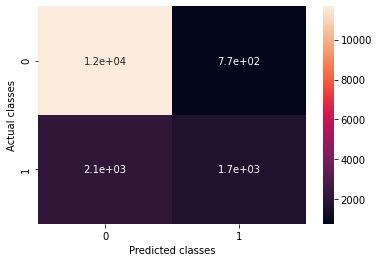

In [305]:
confmat = confusion_matrix(y_test, y_pred)
sns.heatmap(confmat, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [307]:
confmat

array([[11667,   768],
       [ 2147,  1699]])